[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   36.2  59.4 125.6 235.2 272.8 300.  300.  300. ]
 [  0.    0.    0.   27.   47.7 128.3 219.8 280.6 298.2 300.  300. ]
 [  0.    0.    4.4  10.2  45.8 128.4 207.1 264.5 300.  300.  300. ]
 [  0.    0.    0.    7.8  24.3 107.7 201.9 276.5 300.  300.  300. ]
 [  0.    0.    0.    3.1  41.1  84.2 222.6 283.8 300.  300.  300. ]
 [  0.    0.    0.    8.5  21.2 100.2 244.8 281.4 298.6 300.  300. ]
 [  0.    0.    0.    0.   18.9  95.6 234.7 296.6 300.  300.  300. ]
 [  0.    0.    0.    2.6   9.5 108.  237.8 293.1 298.9 300.  300. ]
 [  0.    0.    3.1   2.9  15.1 114.1 265.5 296.6 300.  300.  300. ]
 [  0.    0.    0.    1.   12.   87.3 257.5 297.7 300.  300.  300. ]]


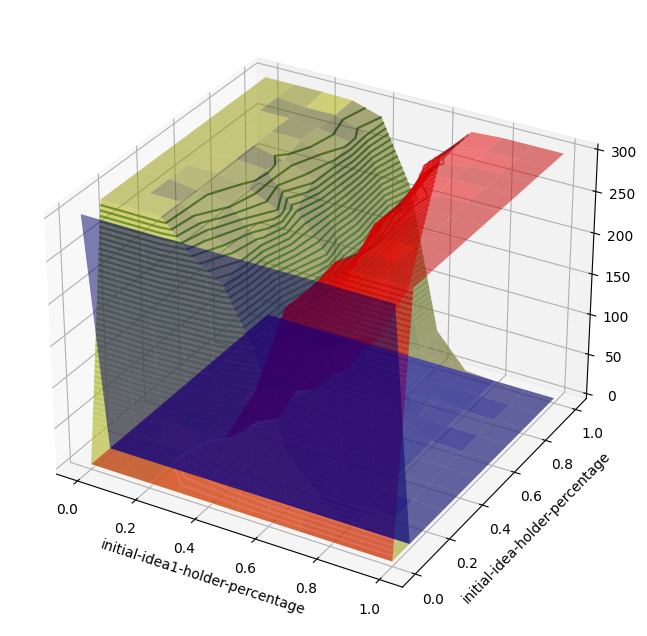

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from CSV file
data = pd.read_csv('Model_1 idea_holders-table.csv')

M=data[['initial-idea-holder-percentage']]
N=data[['initial-idea1-holder-percentage']]
O=data[['count turtles with [Idea_state = 1 ]']]
P=data[['count turtles with [Idea_state = 2 ]']]

average_outcomes = data.groupby(['initial-idea-holder-percentage', 'initial-idea1-holder-percentage'])[['count turtles with [Idea_state = 1 ]','count turtles with [Idea_state = 2 ]']].mean().reset_index()
average_outcomes.rename(columns={'count turtles with [Idea_state = 1 ]': 'Average_Outcome'}, inplace=True)
average_outcomes.to_excel('averaged_outcomes.xlsx', index=False)
data2= pd.read_excel('averaged_outcomes.xlsx')
M=data2[['initial-idea-holder-percentage']]
N=data2[['initial-idea1-holder-percentage']]
O=data2[['Average_Outcome']].to_numpy()
P=data2[['count turtles with [Idea_state = 2 ]']].to_numpy()
Y1=np.zeros((11,11))
Y2=np.zeros((11,11))
Y3=np.zeros((11,11))

for i in range (1,12):
    for j in range (11):
        Y1[i-1,j]=O[(i-1)*11+j,0]
        Y2[i-1,j]=P[(i-1)*11+j,0]
        Y3[i-1,j]= 300-(Y1[i-1,j]+Y2[i-1,j])
X=np.arange(0,1.1,0.1)
Y=np.arange(0,1.1,0.1)
X,Y=np.meshgrid(X, Y)

print(Y1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.contour3D(X, Y, Y1, 50, cmap='Reds', alpha=0.5)
surf1 = ax.plot_surface(X, Y, Y1, color='r', alpha=0.5, label='Surface 1')
ax.contour3D(X, Y, Y2, 50, cmap='Greens', alpha=0.5)
surf2 = ax.plot_surface(X, Y, Y2, color='y', alpha=0.5, label='Surface 2')
ax.contour3D(X, Y, Y2, 50, cmap='Greens', alpha=0.5)
surf3 = ax.plot_surface(X, Y, Y3, color='b', alpha=0.5, label='Surface 3')
# Set labels
ax.set_xlabel('initial-idea1-holder-percentage')
ax.set_ylabel('initial-idea-holder-percentage')

# Show plot
plt.show()








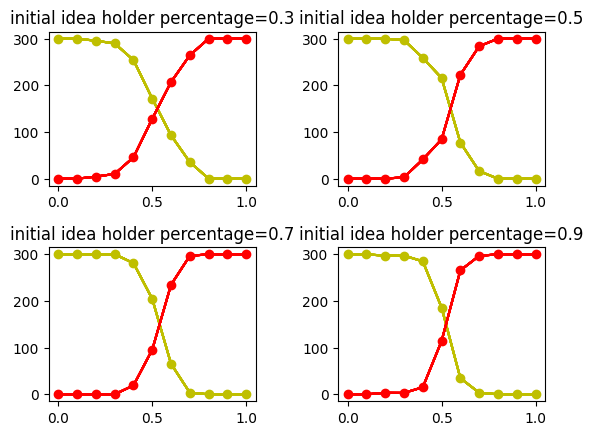

In [146]:
plt.subplot(2,2,1)
plt.plot(Y,Y2[3][:],color='y')
plt.scatter(np.arange(0,1.1,0.1),Y2[3][:],color='y')
plt.plot(Y,Y1[3][:],color='r')
plt.scatter(np.arange(0,1.1,0.1),Y1[3][:],color='r')
plt.title('initial idea holder percentage=0.3')

plt.subplot(2,2,2)
plt.plot(Y,Y2[5][:],color='y')
plt.scatter(np.arange(0,1.1,0.1),Y2[5][:],color='y')
plt.plot(Y,Y1[5][:],color='r')
plt.scatter(np.arange(0,1.1,0.1),Y1[5][:],color='r')
plt.title('initial idea holder percentage=0.5')

plt.subplot(2,2,3)
plt.plot(Y,Y2[7][:],color='y')
plt.scatter(np.arange(0,1.1,0.1),Y2[7][:],color='y')
plt.plot(Y,Y1[7][:],color='r')
plt.scatter(np.arange(0,1.1,0.1),Y1[7][:],color='r')
plt.title('initial idea holder percentage=0.7')

plt.subplot(2,2,4)
plt.plot(Y,Y2[9][:],color='y')
plt.scatter(np.arange(0,1.1,0.1),Y2[9][:],color='y')
plt.plot(Y,Y1[9][:],color='r')
plt.scatter(np.arange(0,1.1,0.1),Y1[9][:],color='r')
plt.title('initial idea holder percentage=0.9')

plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()